# GAN

In [7]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from Discriminator import Discriminator
from Generator import Generator

In [8]:
def view_values(values, height, weight):
    """
    """
    fig, axes = plt.subplots(figsize=(10, 10), nrows=height, ncols=weight, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), values):
        ax.xaxis.set_visible(False),
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,4)), cmap='Greys_r') 
    return fig, axes

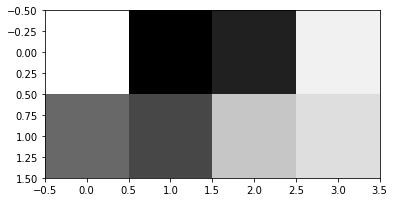

In [9]:
# Examples of faces
faces = np.array([[1,  0.1, 0.2,  0.9],
       [ 0.4,  0.3,  0.7,  0.8],
                 [ 0.4,  0.3,  0.7,  0.8],
                 [ 0.4,  0.3,  0.7,  0.8],
                 [ 0.4,  0.3,  0.7,  0.8],
                 [ 0.4,  0.3,  0.7,  0.8],
                 [ 0.4,  0.3,  0.7,  0.8]])
plt.imshow(faces, cmap = 'Greys_r');

In [10]:
errors_discriminator = []
errors_generator = []

d_weights =  np.array([np.random.normal() for i in range(4)])
d_bias = np.random.normal()

g_weights = np.array([np.random.normal() for i in range(4)])
g_biasses = np.array([np.random.normal() for i in range(4)])

D = Discriminator(d_weights, d_bias)
G = Generator(g_weights, g_biasses)

In [11]:
def mode_collapse_gan(values, alpha, epochs, G, D):
    """
    """
    
    for epoch in range(epochs):
        
        for value in values:
            # updating parameter for Discriminator
            D.update_image(alpha, value)
            
            # Random value 
            z = random.rand()
            
            # Calculate discriminator error
            errors_discriminator.append(D.error_image(value) + D.error_noise(z))
            
            # Calculate the generator error
            errors_generator.append(G.error(z,D))
            
            # Build a fake image
            noise = G.2(z)
            
            # updae noise in Discriminator
            D.update_noise(0.001, noise)
            
            # update noise in Generator
            G.update(z, D, alpha)
            
        print("Epochs ({},{})" .format(epoch, epochs), " Discriminator Error Image:%2.f" %D.error_image(value),
                 " Discriminator Noise Error:",D.error_noise(z), "\n Generator Error:" ,G.error(z,D))
        print("-"*60)
    return G

In [12]:
generator = mode_collapse_gan(values = faces,alpha = 0.0008, epochs=100, G = G, D = D)

Error before: [0.50908324 1.07808944 0.18792768 1.10058163]  -  Error after: [0.5090408  1.07811976 0.18792478 1.1006702 ]
Error before: [0.50017307 1.08931927 0.18768557 1.08205521]  -  Error after: [0.50013203 1.08934826 0.18768286 1.08214216]
Epochs (0,100)  Discriminator Error Image: 1  Discriminator Noise Error: [1.2934288  0.69958    0.93060477 0.51751542] 
 Generator Error: [0.50013203 1.08934826 0.18768286 1.08214216]
------------------------------------------------------------
Error before: [0.47781988 1.11498563 0.18713505 1.03907909]  -  Error after: [0.47778459 1.11501108 0.18713278 1.03915611]
Error before: [0.48253374 1.10960389 0.18724345 1.04806   ]  -  Error after: [0.48249706 1.10963015 0.18724109 1.04813973]
Epochs (1,100)  Discriminator Error Image: 1  Discriminator Noise Error: [1.05276828 0.73860103 0.86628263 0.62811912] 
 Generator Error: [0.48249706 1.10963015 0.18724109 1.04813973]
------------------------------------------------------------
Error before: [0.4

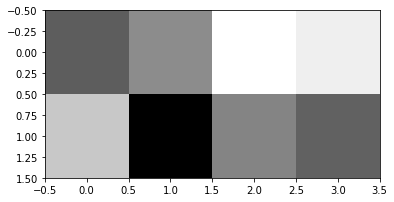

In [14]:
fake_image = np.random.randn(2, 4)
plt.imshow(fake_image, cmap='Greys_r');

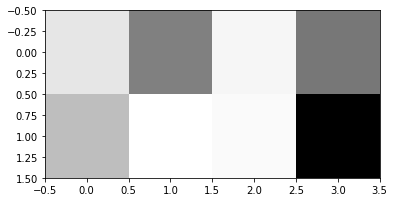

In [15]:
pred_face = generator.predict(fake_image)
plt.imshow(pred_face, cmap='Greys_r');

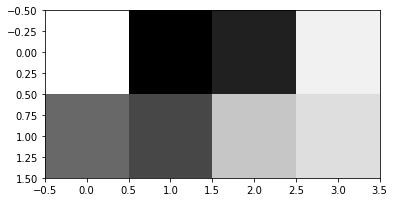

In [16]:
plt.imshow(faces, cmap='Greys_r');